<a href="https://colab.research.google.com/github/Basit-Imam/DeepLearning/blob/master/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from keras.datasets.cifar10 import load_data
(X_train, y_train), (_, __) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
len(X_train)

50000

In [4]:
X_train[0].shape

(32, 32, 3)

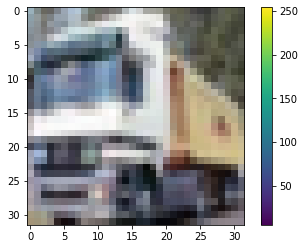

In [5]:
#check the range of pixel values
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)

In [6]:
# class_names = ['Ship','Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Truck']

In [7]:
import pandas as pd
X_test = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [8]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


In [9]:
#Normalizing the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
X_test = X_test.to_numpy()

In [11]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
X_train = X_train.reshape(len(X_train), 32*32*3)

In [13]:
X_train.shape

(50000, 3072)

In [14]:
# Defining the model
model = Sequential()
model.add(Dense(100, input_dim=3072))
    
#hidden layer with 512 neurons
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer with 10 neurons
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 507,438
Trainable params: 507,438
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(x=X_train, y=y_train,validation_split=0.2, batch_size= 128,epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 4ms/step - loss: 1.9072 - accuracy: 0.3023 - val_loss: 1.7816 - val_accuracy: 0.3428
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 1.6809 - accuracy: 0.3965 - val_loss: 1.6822 - val_accuracy: 0.3981
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 1.5785 - accuracy: 0.4324 - val_loss: 1.5823 - val_accuracy: 0.4370
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.5209 - accuracy: 0.4550 - val_loss: 1.5688 - val_accuracy: 0.4496
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.4736 - accuracy: 0.4728 - val_loss: 1.5218 - val_accuracy: 0.4635
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.4221 - accuracy: 0.4911 - val_loss: 1.5469 - val_accuracy: 0.4478
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.3853 - accuracy: 0.5045 - val_loss: 1.5211 - val_accuracy: 0.4606
Epoch 

In [16]:
X_test.shape

(2000, 3072)

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred[0]

array([0.01512315, 0.00225951, 0.07688177, 0.38683897, 0.03529644,
       0.09455252, 0.2929142 , 0.05324   , 0.01011337, 0.03278003],
      dtype=float32)

In [19]:
np.argmax(y_pred[0])

3

In [20]:
predictions = []
for i in y_pred:
  predictions.append(np.argmax(i))


In [21]:
len(predictions)

2000

In [22]:
test_new = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [23]:
res = pd.DataFrame(predictions) 
res.index = test_new.index 
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>